# Background

* <p style="margin: 0;">  PM2.5 describes the small particles of concern; they are "fine particles" (such as those found in smoke and haze), which are 2.5 micrometers in diameter or less.</p>

- <p style="margin: 0;">  Ozone is a very reactive gas made of three atomsof oxygen and is the main component of urban smog. Unlike the oxygen we breathe, ozone can be harmful at high levels.</p>

+ <p style="margin: 0;">  Moreover, these two pollutants both harm human health. In recent years, ozone and PM pollution often occur at the same time, and these two pollutants sometimes show a positive correlation in summertime. Some studies have pointed out that high PM2.5 concentrations suppresses solar radiation and Ozone production in cold season. </p>

# Study Area

For this project, my study area focused on the state of Florida.

* **Temporal Scope:** Over the six years, from 2015 to 2020, I gathered comprehensive data on PM2.5 (Particulate Matter) and Ozone.

* **Spatial Scope:** The study spans across various cities within the state, allowing for a detailed examination of air quality variations at both the state and city levels.


# Python package & Workflow

In [1]:
# Python Package
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import folium
from folium.plugins import HeatMap
import seaborn as sns

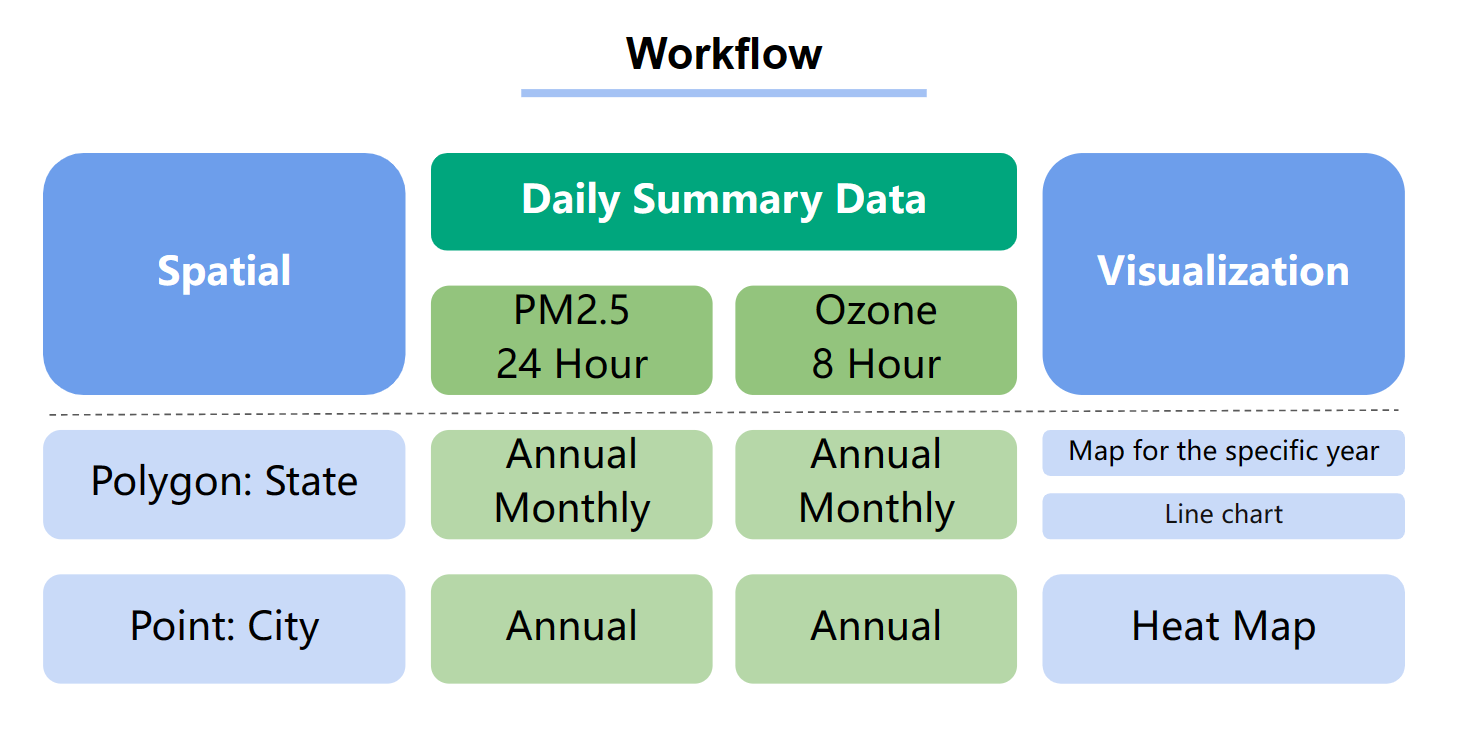

# Findings (4.1, 4.2, 4.3)

## State: Anual Monthly Mean
* **PM2.5 Trends:** The PM2.5 shows a different pattern, with a significant peak around the middle of the year which is July, that is much higher than other months. Summer months often see increased outdoor activities, construction, and traffic, which can result in higher emissions of pollutants contributing to higher PM2.5 levels.  I looked at the July data for those 6 years and found that most of the higher values were for tourist cities, e.g., St. Petersburg, Miami, Clearwater.
 <br />   
* **Ozone Trends:** The Ozone concentration shows variability throughout the year, with a notable peak around April. It then decreases, suggesting a seasonal influence.
 <br /> 
* **Correlation between PM2.5 and Ozone in Florida：** We can see a scatter plot with a regression line that indicates the relationship between PM2.5 (particulate matter with a diameter of less than 2.5 micrometers) and ozone levels, presumably in the air over Florida. The data points represent the mean values of PM2.5 and ozone for different time periods.
<br /> 
The correlation coefficient is 0.39, which suggests there is a moderate positive correlation between PM2.5 levels and ozone levels. This means that, in general, as the concentration of PM2.5 increases, the concentration of ozone also tends to increase, but not very strongly. <br />  
The shaded area around the regression line represents the 95% confidence interval for the estimate of the mean ozone level given a PM2.5 level. This confidence interval indicates the range of values within which we can be 95% confident that the true mean ozone level lies, for any given PM2.5 level. <br />  
The presence of a positive correlation might indicate that the sources of PM2.5 could also be contributing to the generation of ozone, or that the conditions that lead to higher PM2.5 concentrations are also conducive to the formation of ozone. It is important to note that correlation does not imply causation, and further investigation would be needed to understand the nature of the relationship between these two pollutants.



### State: Anual monthly mean (PM2.5)

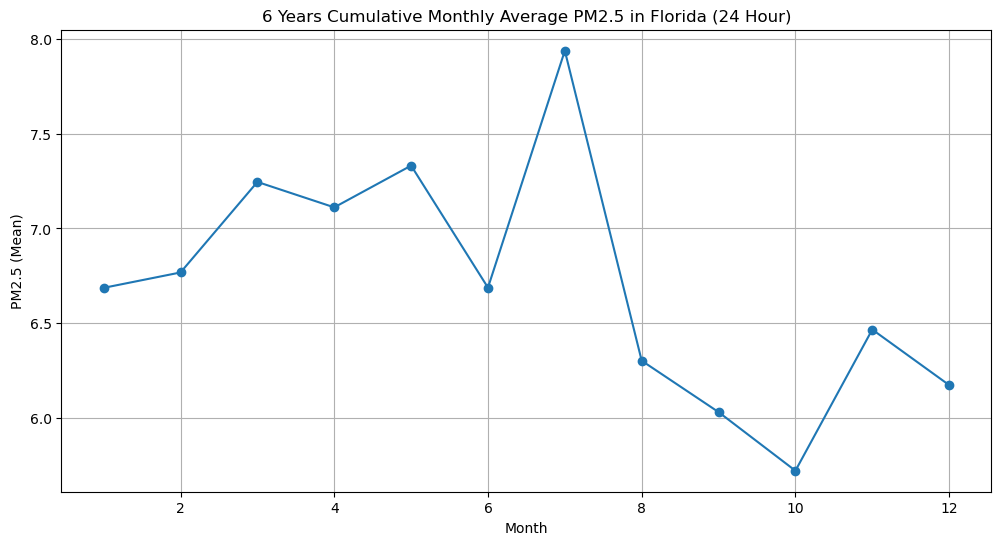

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# List of all file names
pm_6file = ['daily_88101_2015.csv', 'daily_88101_2016.csv', 'daily_88101_2017.csv', 'daily_88101_2018.csv', 'daily_88101_2019.csv', 'daily_88101_2020.csv']

# Empty DataFrame to store all data
all_data_pm = pd.DataFrame()

# Loop to read and merge data
for file_name in pm_6file:
    file_path = os.path.join('E:\Gis programming\Proposal\cleaning\PM2.5', file_name)
    df = pd.read_csv(file_path)
    all_data_pm = pd.concat([all_data_pm, df])

# Convert date column to datetime object
all_data_pm['Date Local'] = pd.to_datetime(all_data_pm['Date Local'])

# Replace spaces in column names with underscores
all_data_pm.columns = all_data_pm.columns.str.replace(' ', '_')

# Extract month
all_data_pm['month'] = all_data_pm['Date_Local'].dt.month
all_data_pm['year'] = all_data_pm['Date_Local'].dt.year

# Filter data for State Name 'Florida' and Sample Duration '24 HOUR'
pm_florida_data = all_data_pm[(all_data_pm['State_Name'] == 'Florida') & (all_data_pm['Sample_Duration'] == '24 HOUR')]


# Calculate monthly averages
pm_monthly_avg = pm_florida_data.groupby('month')['Arithmetic_Mean'].mean().reset_index()

# Plot the curve
plt.figure(figsize=(12, 6))
plt.plot(pm_monthly_avg['month'], pm_monthly_avg['Arithmetic_Mean'], marker='o', linestyle='-')
plt.title('6 Years Cumulative Monthly Average PM2.5 in Florida (24 Hour)')
plt.xlabel('Month')
plt.ylabel('PM2.5 (Mean)')
plt.grid(True)
plt.show()



### State: Anual monthly mean (Ozone)

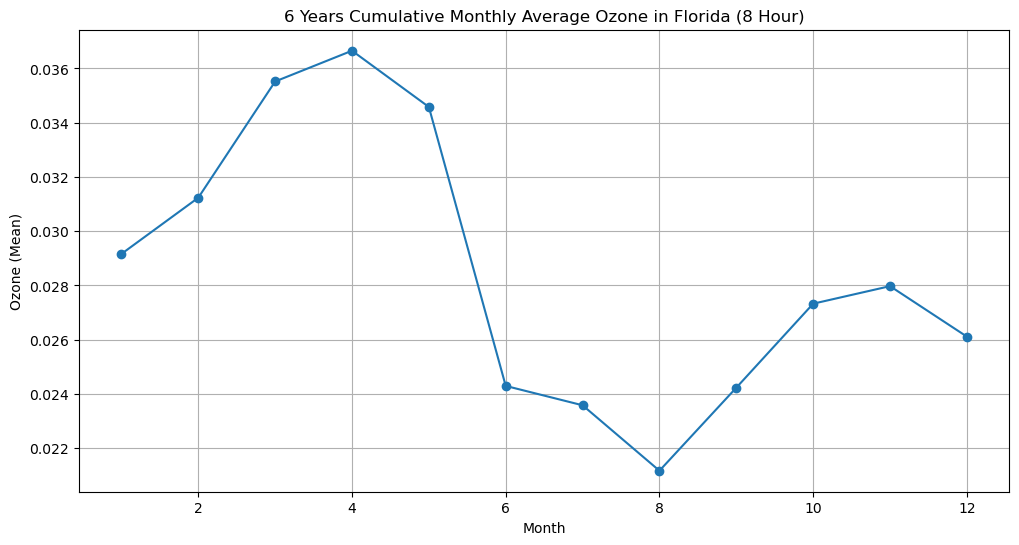

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# List of all file names
o3_6file = ['daily_44201_2015.csv', 'daily_44201_2016.csv', 'daily_44201_2017.csv', 'daily_44201_2018.csv', 'daily_44201_2019.csv', 'daily_44201_2020.csv']

# Empty DataFrame to store all data
all_data_o3 = pd.DataFrame()

# Loop to read and merge data
for file_name in o3_6file:
    file_path = os.path.join('E:\Gis programming\Proposal\cleaning\O3', file_name)  # 替换为你文件的路径
    df = pd.read_csv(file_path)
    all_data_o3 = pd.concat([all_data_o3, df])

# Convert date column to datetime object
all_data_o3['Date Local'] = pd.to_datetime(all_data_o3['Date Local'])

# Replace spaces in column names with underscores
all_data_o3.columns = all_data_o3.columns.str.replace(' ', '_')

# Extract month and year
all_data_o3['month'] = all_data_o3['Date_Local'].dt.month
all_data_o3['year'] = all_data_o3['Date_Local'].dt.year

# Filter data for State Name 'Florida' and Sample Duration '24 HOUR'
o3_florida_data = all_data_o3[(all_data_o3['State_Name'] == 'Florida') & (all_data_o3['Sample_Duration'] == '8-HR RUN AVG BEGIN HOUR')]


# Calculate monthly averages
o3_monthly_avg = o3_florida_data.groupby('month')['Arithmetic_Mean'].mean().reset_index()

# Plot the curve
plt.figure(figsize=(12, 6))
plt.plot(o3_monthly_avg['month'], o3_monthly_avg['Arithmetic_Mean'], marker='o', linestyle='-')
plt.title('6 Years Cumulative Monthly Average Ozone in Florida (8 Hour)')
plt.xlabel('Month')
plt.ylabel('Ozone (Mean)')
plt.grid(True)
plt.show()



### State: Anual monthly mean ( PM2.5 & Ozone)

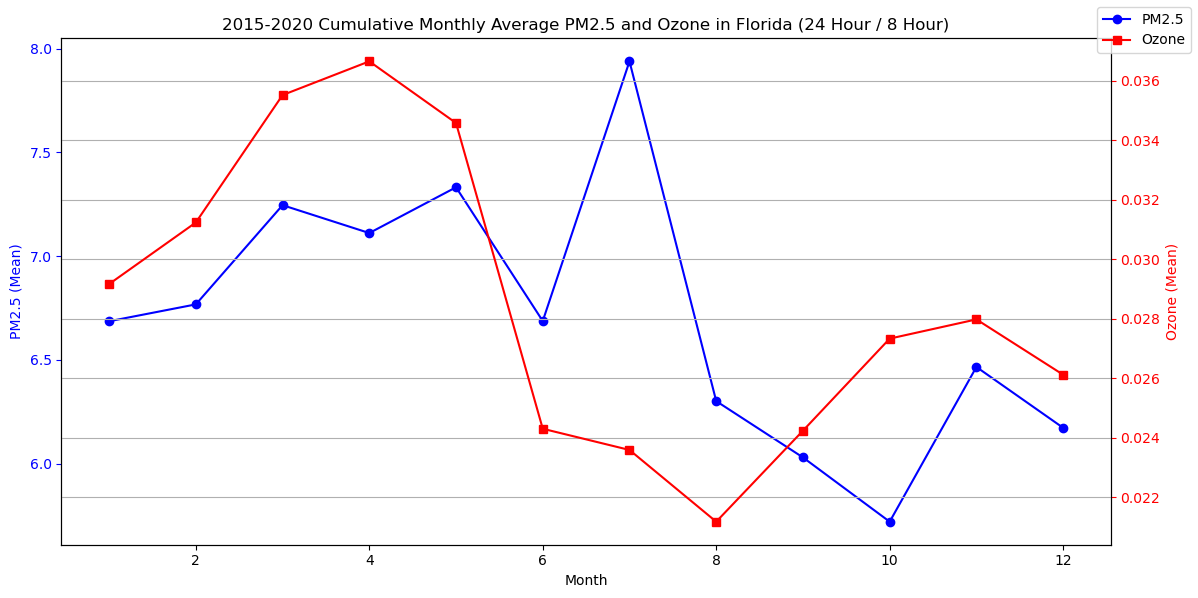

In [4]:
# Plot both curves on the same graph with different y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot PM2.5 curve
ax1.plot(pm_monthly_avg['month'], pm_monthly_avg['Arithmetic_Mean'], marker='o', linestyle='-', color='b', label='PM2.5')
ax1.set_xlabel('Month')
ax1.set_ylabel('PM2.5 (Mean)', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for Ozone data
ax2 = ax1.twinx()
ax2.plot(o3_monthly_avg['month'], o3_monthly_avg['Arithmetic_Mean'], marker='s', linestyle='-', color='r', label='Ozone')
ax2.set_ylabel('Ozone (Mean)', color='r')
ax2.tick_params('y', colors='r')

# Title and legend
plt.title('2015-2020 Cumulative Monthly Average PM2.5 and Ozone in Florida (24 Hour / 8 Hour)')
fig.tight_layout()
fig.legend(loc='upper right')

# Display the grid
plt.grid(True)


plt.show()


### Correlation between PM2.5 and Ozone in Florida

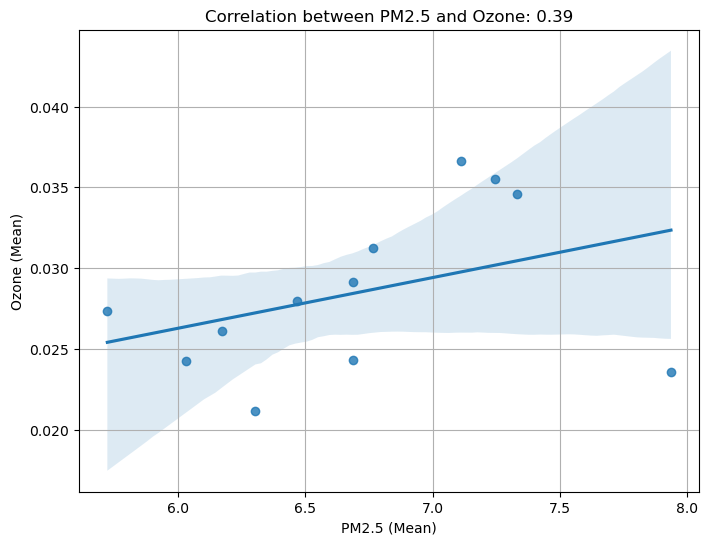

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have pm_monthly_avg and o3_monthly_avg DataFrames

# Merge data based on common columns (year and month)
merged_data = pd.merge(pm_monthly_avg, o3_monthly_avg, on=['month'], suffixes=('_pm', '_o3'))

# Calculate the correlation coefficient
correlation_coefficient = merged_data['Arithmetic_Mean_pm'].corr(merged_data['Arithmetic_Mean_o3'])

# Create a scatter plot with regression line and confidence interval
plt.figure(figsize=(8, 6))
sns.regplot(x='Arithmetic_Mean_pm', y='Arithmetic_Mean_o3', data=merged_data, ci=95)
plt.title(f'Correlation between PM2.5 and Ozone: {correlation_coefficient:.2f}')
plt.xlabel('PM2.5 (Mean)')
plt.ylabel('Ozone (Mean)')
plt.grid(True)
plt.show()


## State: Yearly Mean
* **PM2.5 (4.2.1):** Each map represents the annual average PM2.5 concentration for different years in Florida. In 2017 and 2020, the annual average PM2.5 concentrations were higher compared to other years.
* **Ozone (4.2.2):** Over the six-year period, with particularly notable higher concentrations in 2016, From 2016 to 2020, there is a trend of decreasing ozone concentrations year by year.

<Axes: >

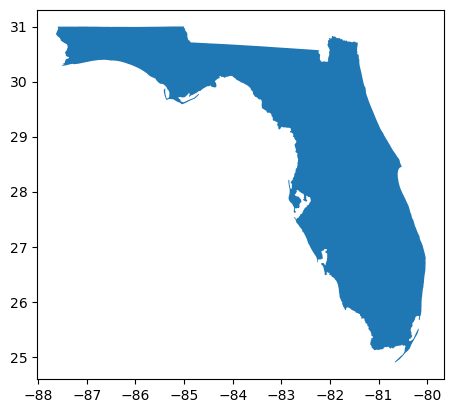

In [6]:
import geopandas as gpd
fl = gpd.read_file("E:\Gis programming\Proposal\shape file\Florida\Florida\poly.shp")
fl.plot()

### State: Yearly mean 2015-2020 (PM2.5)

#### Prepare data: Calculate the annual average of PM2.5 concentrations in Florida from 2015-2020

In [7]:
# calculate the yearly mean of PM2.5, merge it and Fl geometry

# pm_florida_data: Use the data we filtered before( State Name 'Florida' and Sample Duration '24 Hour' )
# Calculate annual averages and rename the column
pm_annual_avg = pm_florida_data.groupby('year')['Arithmetic_Mean'].mean().reset_index()
pm_annual_avg.rename(columns={'Arithmetic_Mean': 'PM2.5_Mean', 'State_Name': 'NAME'}, inplace=True)

# Retain the 'State_Name' column and rename it to 'Name'
pm_annual_avg['NAME'] = 'Florida'

pm_join= pd.merge(fl,pm_annual_avg, how="left", on= "NAME")
pm_join

,NAME,geometry,year,PM2.5_Mean
0,Florida,"POLYGON ((-87.63484 30.86611, -87.62999 30.877...",2015,6.427210
1,Florida,"POLYGON ((-87.63484 30.86611, -87.62999 30.877...",2016,6.711577
2,Florida,"POLYGON ((-87.63484 30.86611, -87.62999 30.877...",2017,7.266260
3,Florida,"POLYGON ((-87.63484 30.86611, -87.62999 30.877...",2018,6.666706
4,Florida,"POLYGON ((-87.63484 30.86611, -87.62999 30.877...",2019,6.629353
5,Florida,"POLYGON ((-87.63484 30.86611, -87.62999 30.877...",2020,6.821519


#### Create subplots for each year

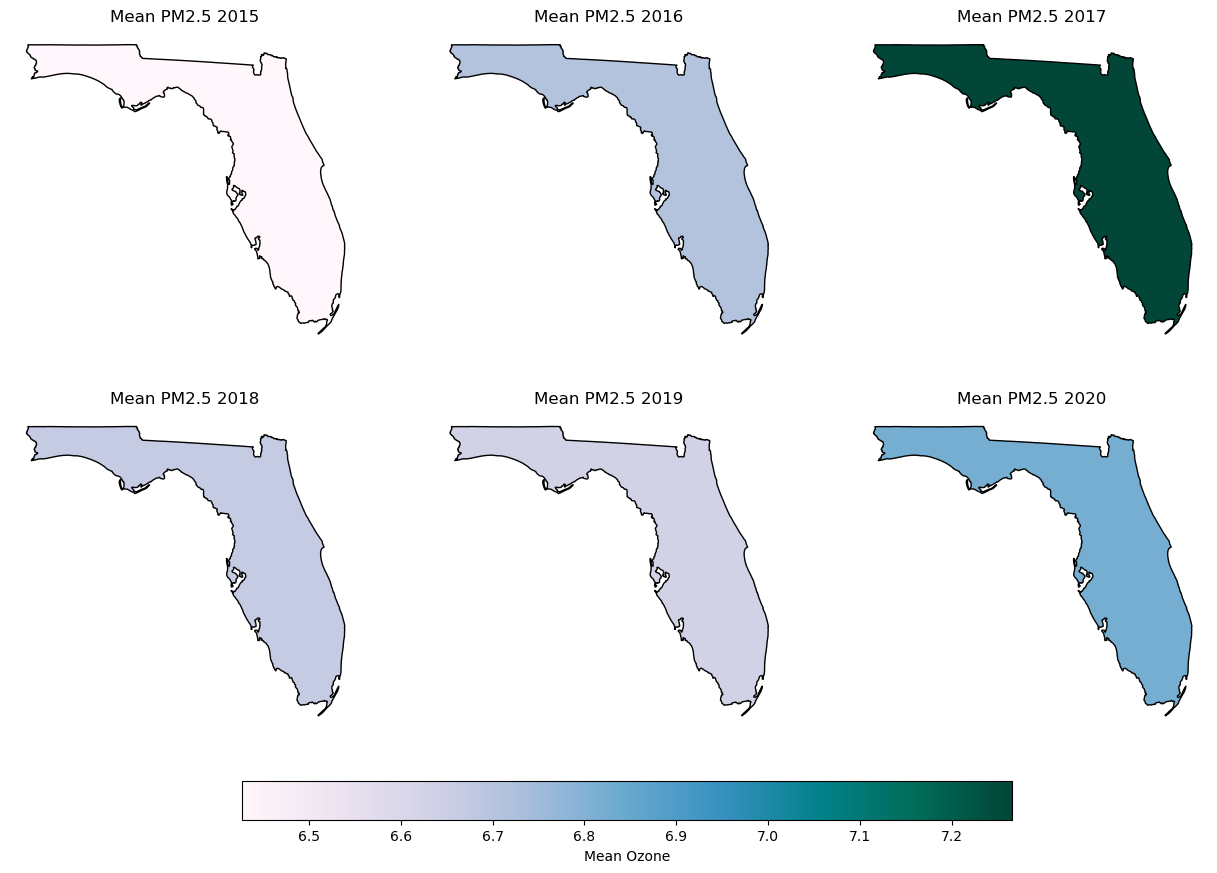

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a list of years from 2015 to 2020
years = range(2015, 2021)

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()


# Initialize variables to track min and max ozone values across all years
min_pm = pm_join['PM2.5_Mean'].min()
max_pm = pm_join['PM2.5_Mean'].max()

for i, year in enumerate(years):
    # Filter data for the specific year
    data_year_pm = pm_join[pm_join['year'] == year] 
    
    #print(data_year_pm.iloc[0,:])
    # Plotting the map for the specific year on the corresponding subplot
    data_year_pm.plot(ax=axes[i],column='PM2.5_Mean',cmap='PuBuGn', legend=False, vmin=min_pm, vmax=max_pm, edgecolor='black')
    axes[i].set_title(f'Mean PM2.5 {year}')
    axes[i].set_axis_off()  # Turn off axis for cleaner visualization

# Create a common color bar legend for all subplots
norm = mcolors.Normalize(vmin=min_pm, vmax=max_pm)
sm = plt.cm.ScalarMappable(cmap='PuBuGn', norm=norm)
sm.set_array([])  # Empty array required for the colorbar to work
cbar = fig.colorbar(sm, ax=axes, orientation='horizontal', fraction=0.05, pad=0.05)
cbar.set_label('Mean Ozone')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.2, hspace=0.2)
plt.show()

### State: Yearly mean 2015-2020 (Ozone)

#### Prepare data: Calculate the annual average of Ozone concentrations in Florida from 2015-2020

In [9]:
# calculate the yearly mean of Ozone, merge it and Fl geometry

# o3_florida_data: Use the data we filtered before( State Name 'Florida' and Sample Duration '8-HR RUN AVG BEGIN HOUR' )
# Calculate annual averages and rename the column
o3_annual_avg = o3_florida_data.groupby('year')['Arithmetic_Mean'].mean().reset_index()
o3_annual_avg.rename(columns={'Arithmetic_Mean': 'O3_Mean', 'State_Name': 'NAME'}, inplace=True)

# Retain the 'State_Name' column and rename it to 'Name'
o3_annual_avg['NAME'] = 'Florida'

# merge Fl geometry and Ozone data
o3_join= pd.merge(fl,o3_annual_avg, how="left", on= "NAME")
o3_join

,NAME,geometry,year,O3_Mean
0,Florida,"POLYGON ((-87.63484 30.86611, -87.62999 30.877...",2015,0.027490
1,Florida,"POLYGON ((-87.63484 30.86611, -87.62999 30.877...",2016,0.029698
2,Florida,"POLYGON ((-87.63484 30.86611, -87.62999 30.877...",2017,0.028792
3,Florida,"POLYGON ((-87.63484 30.86611, -87.62999 30.877...",2018,0.028652
4,Florida,"POLYGON ((-87.63484 30.86611, -87.62999 30.877...",2019,0.028953
5,Florida,"POLYGON ((-87.63484 30.86611, -87.62999 30.877...",2020,0.027570


#### Create subplots for each year

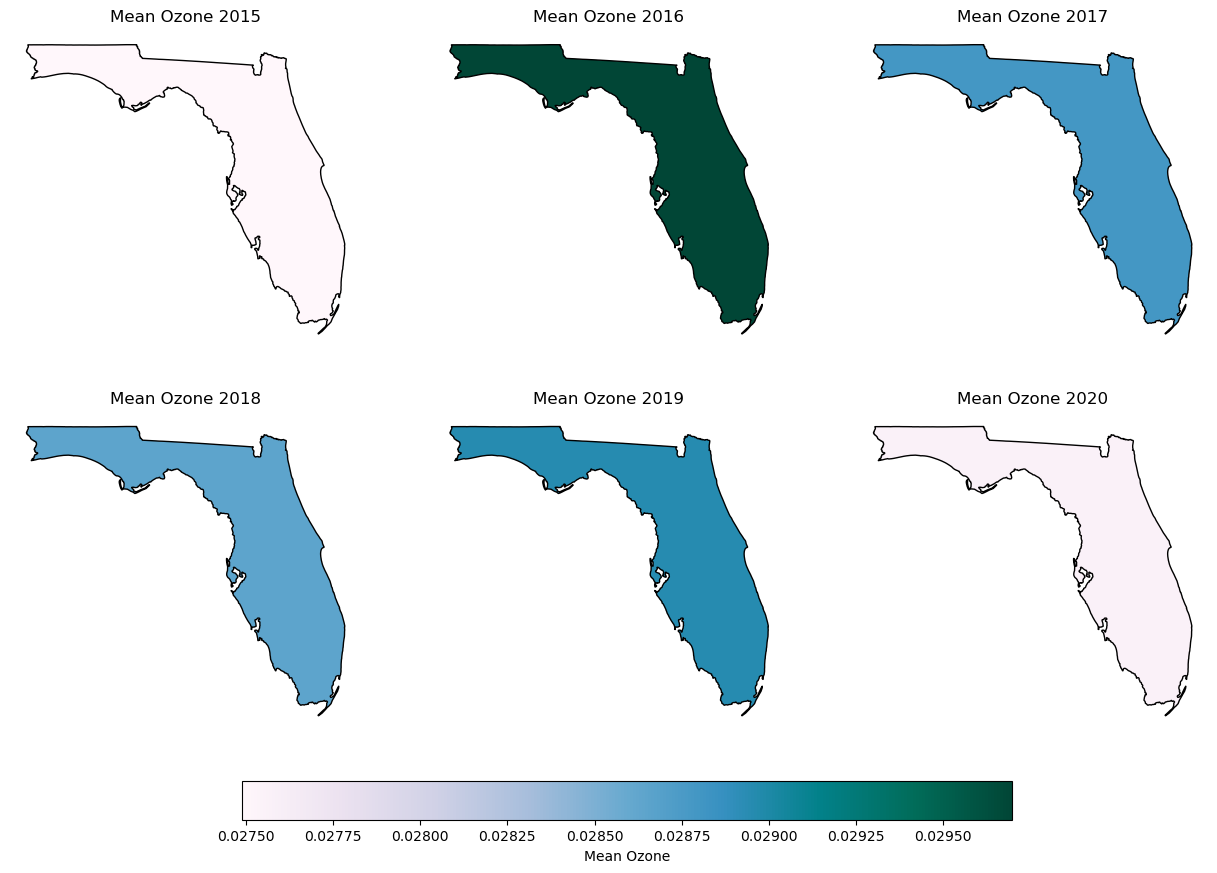

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a list of years from 2015 to 2020
years = range(2015, 2021)

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()


# Initialize variables to track min and max ozone values across all years
min_o3 = o3_join['O3_Mean'].min()
max_o3 = o3_join['O3_Mean'].max()

for i, year in enumerate(years):
    # Filter data for the specific year
    data_year_o3 = o3_join[o3_join['year'] == year] 
    
#    print(data_year_o3.iloc[0,:])
    # Plotting the map for the specific year on the corresponding subplot
    data_year_o3.plot(ax=axes[i],column='O3_Mean',cmap='PuBuGn', legend=False, vmin=min_o3, vmax=max_o3, edgecolor='black')
    axes[i].set_title(f'Mean Ozone {year}')
    axes[i].set_axis_off()  # Turn off axis for cleaner visualization

# Create a common color bar legend for all subplots
norm = mcolors.Normalize(vmin=min_o3, vmax=max_o3)
sm = plt.cm.ScalarMappable(cmap='PuBuGn', norm=norm)
sm.set_array([])  # Empty array required for the colorbar to work
cbar = fig.colorbar(sm, ax=axes, orientation='horizontal', fraction=0.05, pad=0.05)
cbar.set_label('Mean Ozone')

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.2, hspace=0.2)
plt.show()

## Cities in FL: Yearly Average of PM2.5 & Ozone

**PM2.5:**
* **Yearly Trends:** There is a visible trend where certain years, such as 2017, show darker shades of blue across multiple cities, indicating higher PM2.5 concentrations.
* **City-Specific Data:** Some cities show consistently higher levels of PM2.5 throughout the years. For example, Tallahassee and Ferry pass start with a very high concentration in 2015 (7.5 micrograms/cubic meter), which are the highest value on the chart for that year, and generally maintains higher levels compared to other cities.

**Ozone:**
* **Trends:** No clear trend of increase or decrease is immediately apparent across the state as a whole, suggesting that changes in ozone levels are more complex and may be influenced by various factors. Comparing the average concentrations between different cities can be useful. For example, comparing coastal versus inland cities could reveal the influence of maritime air on ozone levels.



### Cities in FL: PM2.5 Yearly Average (2015-2020) 

In [11]:
import geopandas as gpd

city = gpd.read_file("E:\Gis programming\Proposal\shape file\city\city.shp")

print(city) 

                       Name                              geometry
0                 Bradenton  POINT Z (-82.57481 27.49822 0.00000)
1                   Bunnell  POINT Z (-81.25697 29.46438 0.00000)
2                Cape Coral  POINT Z (-81.94953 26.56286 0.00000)
3                Clearwater  POINT Z (-82.79586 27.96551 0.00000)
4                  Clermont  POINT Z (-81.77286 28.54928 0.00000)
5               Cocoa Beach  POINT Z (-80.60793 28.32008 0.00000)
6              Cutler Ridge  POINT Z (-80.34686 25.58084 0.00000)
7                 Dade City  POINT Z (-82.19536 28.36380 0.00000)
8                     Davie  POINT Z (-80.25212 26.07648 0.00000)
9             Daytona Beach  POINT Z (-81.02264 29.21090 0.00000)
10               Ferry Pass  POINT Z (-87.21999 30.51026 0.00000)
11         Fort Myers Beach  POINT Z (-81.94815 26.45202 0.00000)
12              Fort Pierce  POINT Z (-80.32562 27.44670 0.00000)
13        Fort Walton Beach  POINT Z (-86.61697 30.42004 0.00000)
14        

#### Prepare data: Extract the 6 years city annual mean - PM2.5

In [12]:
import pandas as pd

def process_pm_data(file_path, target_year, target_state):
    # Read data
    pm_data = pd.read_csv(file_path)

    # Delete spaces in column names
    pm_data.columns = pm_data.columns.str.replace(" ", "_")

    # Convert 'Date_Local' column to datetime format
    pm_data['Date_Local'] = pd.to_datetime(pm_data['Date_Local'], format='%Y-%m-%d')

    # Extract the year, state, and PM2.5 columns
    pm_data['Year'] = pm_data['Date_Local'].dt.year
    pm_data['State'] = pm_data['State_Name']
    pm_data['PM2.5'] = pm_data['Arithmetic_Mean']
    pm_data['Name'] = pm_data['City_Name']

    
    # Drop unnecessary columns
    pm_data = pm_data[['State', 'Year', 'PM2.5', 'Name', 'Sample_Duration']]

    # Filter data for the target year, state, and Sample_Duration
    pm_data = pm_data[(pm_data['State'] == target_state) & (pm_data['Sample_Duration'] == '24 HOUR')]


    # Group by state and city, calculate the annual average PM2.5
    average_pm25 = pm_data.groupby(['Name', 'Year'])['PM2.5'].mean().reset_index()

    return average_pm25

# Create an empty DataFrame to store the results
pm_city_years = pd.DataFrame()

# Usage for multiple files (2015-2020) for Florida cities
file_paths = ['E:\Gis programming\Proposal\cleaning\PM2.5\daily_88101_2015.csv', 
              'E:\Gis programming\Proposal\cleaning\PM2.5\daily_88101_2016.csv', 
              'E:\Gis programming\Proposal\cleaning\PM2.5\daily_88101_2017.csv',
              'E:\Gis programming\Proposal\cleaning\PM2.5\daily_88101_2018.csv',
              'E:\Gis programming\Proposal\cleaning\PM2.5\daily_88101_2019.csv',
              'E:\Gis programming\Proposal\cleaning\PM2.5\daily_88101_2020.csv']

for year in range(2015, 2021):
    # Process each file for the respective year and state (Florida)
    pm_city_result = process_pm_data(file_paths[year - 2015], year, 'Florida')
    
    # Concatenate the result to the total DataFrame
    pm_city_years = pd.concat([pm_city_years, pm_city_result], ignore_index=True)

# Convert the 'Year' column to datetime format
pm_city_years['Year'] = pd.to_datetime(pm_city_years['Year'], format='%Y')

# Print the final combined DataFrame for Florida cities
print(pm_city_years)

# Save the final combined DataFrame for Florida cities to a CSV file
pm_city_years.to_csv(r"E:\Gis programming\Proposal\cleaning\pm_city_year.csv", index=False)


                   Name       Year     PM2.5
0            Clearwater 2015-01-01  6.645283
1         Coconut Creek 2015-01-01  5.624138
2                 Davie 2015-01-01  6.471638
3         Daytona Beach 2015-01-01  5.782203
4          Delray Beach 2015-01-01  5.022936
..                  ...        ...       ...
105  Palm Springs North 2020-01-01  6.418033
106  Ridge Wood Heights 2020-01-01  5.780000
107             Sanford 2020-01-01  5.754839
108         Tallahassee 2020-01-01  7.335664
109             Valrico 2020-01-01  7.646212

[110 rows x 3 columns]


,Name,geometry,Year,PM2.5
3,Clearwater,POINT Z (-82.79586 27.96551 0.00000),2015-01-01,6.645283
4,Clearwater,POINT Z (-82.79586 27.96551 0.00000),2016-01-01,6.736975
5,Clearwater,POINT Z (-82.79586 27.96551 0.00000),2017-01-01,7.661864
6,Clearwater,POINT Z (-82.79586 27.96551 0.00000),2018-01-01,6.826957
7,Clearwater,POINT Z (-82.79586 27.96551 0.00000),2019-01-01,6.288889
...,...,...,...,...
95,Valrico,POINT Z (-82.24212 27.94630 0.00000),2018-01-01,6.950251
96,Valrico,POINT Z (-82.24212 27.94630 0.00000),2019-01-01,7.207857
97,Valrico,POINT Z (-82.24212 27.94630 0.00000),2020-01-01,7.646212
99,Winter Park,POINT Z (-81.33938 28.59980 0.00000),2015-01-01,6.297319


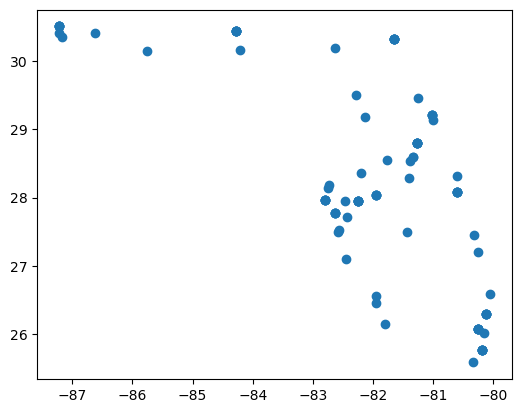

In [13]:
# merge the PM2.5 city yearly data and city(point data)
pm_city_join = pd.merge(city, pm_city_years, how="left", on= "Name")
pm_city_join.plot()
pm_city_join = pm_city_join.dropna()
pm_city_join


#### Heatmap - PM2.5 Yearly Average (2015-2020)

In [14]:
import folium
from folium.plugins import HeatMap
import geopandas as gpd

# Load the Florida boundary GeoDataFrame

fl_wgs84 = fl.to_crs(epsg=4326)

# Extract latitude and longitude for the heatmap
heat_data = [[point.y, point.x] for point in pm_city_join.geometry]

# Create a map centered around the mean location of your points
map_center = [pm_city_join.geometry.y.mean(), pm_city_join.geometry.x.mean()]
map = folium.Map(location=map_center, zoom_start=6)

# Add the HeatMap layer
HeatMap(heat_data).add_to(map)

# Overlay Calhoun County Boundary
for _, row in fl_wgs84.iterrows():
    # Assuming the boundary is a Polygon or MultiPolygon
    sim_geo = gpd.GeoSeries(row['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {'fillColor': 'transparent', 'color': 'blue'})
    geo_j.add_to(map)

# Display the map
map


In [15]:
import folium
from folium.plugins import HeatMapWithTime
import geopandas as gpd
import pandas as pd


# Convert CRS to WGS84 for both datasets
joined_wgs84 = pm_city_join
fl_wgs84 = fl.to_crs(epsg=4326)

# Convert the date column to datetime and sort the DataFrame
joined_wgs84['Year'] = pd.to_datetime(joined_wgs84['Year'])
joined_wgs84 = joined_wgs84.sort_values(by='Year')

# Extract latitude, longitude, and date
joined_wgs84['latitude'] = joined_wgs84.geometry.y
joined_wgs84['longitude'] = joined_wgs84.geometry.x

# Group data by date and create a list of lists of [lat, lon] pairs
time_indexed_data = joined_wgs84.groupby(joined_wgs84['Year'].dt.date).apply(
    lambda group: group[['latitude', 'longitude']].values.tolist()
).tolist()

# Create date index for HeatMapWithTime
date_index = [str(date) for date in joined_wgs84['Year'].dt.date.unique()]

# Create a Map centered around FL
map_center = [fl_wgs84.geometry.centroid.y.mean(), fl_wgs84.geometry.centroid.x.mean()]
map = folium.Map(location=map_center, zoom_start=6)

# Overlay FL Boundary
for _, row in fl_wgs84.iterrows():
    sim_geo = gpd.GeoSeries(row['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {'fillColor': 'transparent', 'color': 'blue'})
    geo_j.add_to(map)

# Add the HeatMapWithTime layer
HeatMapWithTime(time_indexed_data, index=date_index).add_to(map)

# Or save the map to an HTML file
map.save("heatmap_with_time_city_year_PM2.5.html")

# Display the map
map

C:\Users\weini\AppData\Local\Temp\ipykernel_1756\2057385556.py:28: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [fl_wgs84.geometry.centroid.y.mean(), fl_wgs84.geometry.centroid.x.mean()]


#### Grid Heatmap - PM2.5 Yearly Average (2015-2020)

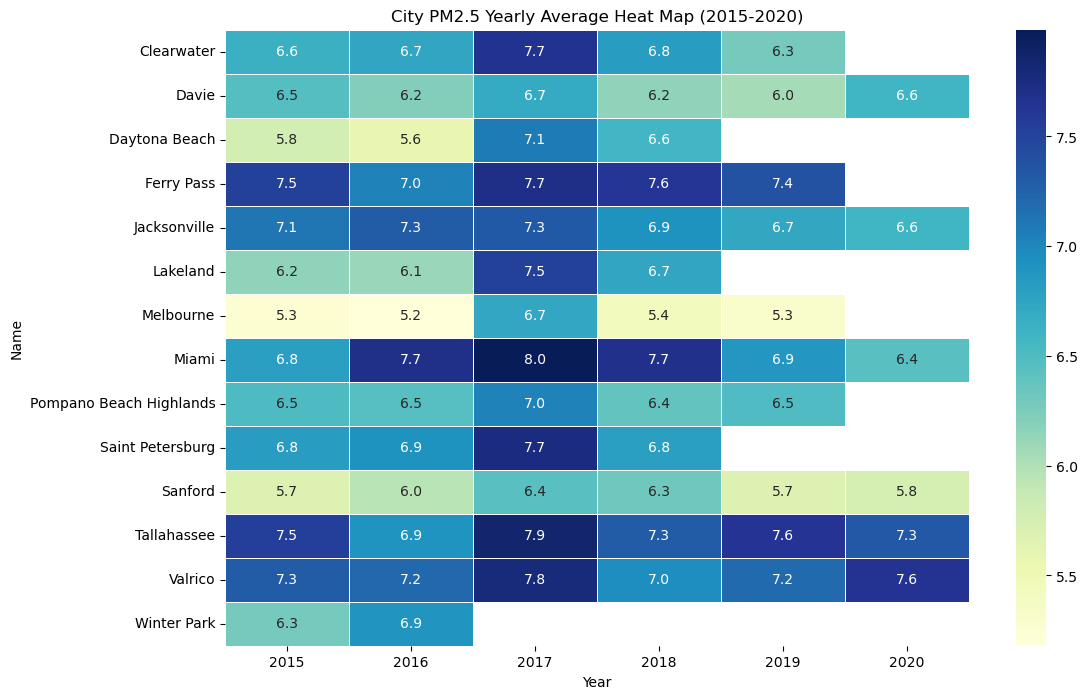

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# read pm_city_year data
#pm_city_year = pd.read_csv("E:\\Gis programming\\Proposal\\cleaning\\pm_city_year.csv")

# conbine
#merged_data = pd.merge(city,pm_city_year, how="left", on= "Name")

# creat pivot table for heat map
heatmap_data = pm_city_join.pivot_table(index='Name', columns='Year', values='PM2.5', aggfunc='mean')
heatmap_data.columns = heatmap_data.columns.year

# create heat map
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5)
plt.title('City PM2.5 Yearly Average Heat Map (2015-2020)')
plt.show()




### Cities in FL: Ozone Yearly Average (2015-2020) 

#### Prepare data: Extract the 6 years city annual mean - Ozone

In [17]:
import pandas as pd

def process_pm_data(file_path, target_year, target_state):
    # Read data
    data = pd.read_csv(file_path)

    # Delete spaces in column names
    data.columns = data.columns.str.replace(" ", "_")

    # Convert 'Date_Local' column to datetime format
    data['Date_Local'] = pd.to_datetime(data['Date_Local'], format='%Y-%m-%d')

    # Extract the year, state, and PM2.5 columns
    data['Year'] = data['Date_Local'].dt.year
    data['State'] = data['State_Name']
    data['Ozone'] = data['Arithmetic_Mean']
    data['Name'] = data['City_Name']

    # Drop unnecessary columns
    data = data[['State', 'Year', 'Ozone', 'Name']]

    # Filter data for the target year and state
    data = data[data['State'] == target_state]

    # Group by state and city, calculate the annual average PM2.5
    average = data.groupby(['Name', 'Year'])['Ozone'].mean().reset_index()

    return average

# Create an empty DataFrame to store the results
o3_city_years = pd.DataFrame()

file_paths = ["E:\Gis programming\Proposal\cleaning\O3\daily_44201_2015.csv", 
              "E:\Gis programming\Proposal\cleaning\O3\daily_44201_2016.csv", 
              "E:\Gis programming\Proposal\cleaning\O3\daily_44201_2017.csv",
              "E:\Gis programming\Proposal\cleaning\O3\daily_44201_2018.csv",
              "E:\Gis programming\Proposal\cleaning\O3\daily_44201_2019.csv",
              "E:\Gis programming\Proposal\cleaning\O3\daily_44201_2020.csv"]

for year in range(2015, 2021):
    # Process each file for the respective year and state (Florida)
    o3_city_result = process_pm_data(file_paths[year - 2015], year, 'Florida')
    
    # Concatenate the result to the total DataFrame
    o3_city_years = pd.concat([o3_city_years,o3_city_result], ignore_index=True)

# Convert the 'Year' column to datetime format
o3_city_years['Year'] = pd.to_datetime(o3_city_years['Year'], format='%Y')
    
# Print the final combined DataFrame for Florida cities
print(o3_city_years)

# Save the final combined DataFrame for Florida cities to a CSV file
o3_city_years.to_csv(r"E:\Gis programming\Proposal\cleaning\o3_city_year.csv", index=False)


               Name       Year     Ozone
0         Bradenton 2015-01-01  0.027320
1           Bunnell 2015-01-01  0.026030
2        Cape Coral 2015-01-01  0.028959
3        Clearwater 2015-01-01  0.027897
4          Clermont 2015-01-01  0.028580
..              ...        ...       ...
276           Tampa 2020-01-01  0.029083
277  Tarpon Springs 2020-01-01  0.025859
278         Valrico 2020-01-01  0.027332
279          Venice 2020-01-01  0.026059
280     Winter Park 2020-01-01  0.028321

[281 rows x 3 columns]


In [19]:
o3_city_join= pd.merge(city, o3_city_years, how="left", on= "Name")
o3_city_join

,Name,geometry,Year,Ozone
0,Bradenton,POINT Z (-82.57481 27.49822 0.00000),2015-01-01,0.027320
1,Bradenton,POINT Z (-82.57481 27.49822 0.00000),2016-01-01,0.028225
2,Bradenton,POINT Z (-82.57481 27.49822 0.00000),2017-01-01,0.028721
3,Bradenton,POINT Z (-82.57481 27.49822 0.00000),2018-01-01,0.029546
4,Bradenton,POINT Z (-82.57481 27.49822 0.00000),2019-01-01,0.028806
...,...,...,...,...
263,Winter Park,POINT Z (-81.33938 28.59980 0.00000),2016-01-01,0.030357
264,Winter Park,POINT Z (-81.33938 28.59980 0.00000),2017-01-01,0.029182
265,Winter Park,POINT Z (-81.33938 28.59980 0.00000),2018-01-01,0.029468
266,Winter Park,POINT Z (-81.33938 28.59980 0.00000),2019-01-01,0.029570


#### Heatmap - Ozone Yearly Average (2015-2020)

In [26]:
import folium
from folium.plugins import HeatMap
import geopandas as gpd

# Load the Florida boundary GeoDataFrame

fl_wgs84 = fl.to_crs(epsg=4326)

# Extract latitude and longitude for the heatmap
heat_data_2 = [[point.y, point.x] for point in o3_city_join.geometry]

# Create a map centered around the mean location of your points
map_center_o3 = [o3_city_join.geometry.y.mean(), o3_city_join.geometry.x.mean()]
map_o3 = folium.Map(location=map_center_o3, zoom_start=6)

# Add the HeatMap layer
HeatMap(heat_data).add_to(map_o3)

# Overlay Calhoun County Boundary
for _, row in fl_wgs84.iterrows():
    # Assuming the boundary is a Polygon or MultiPolygon
    sim_geo = gpd.GeoSeries(row['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {'fillColor': 'transparent', 'color': 'blue'})
    geo_j.add_to(map_o3)

# Display the map
map_o3


In [20]:
import folium
from folium.plugins import HeatMapWithTime
import geopandas as gpd
import pandas as pd

# Convert CRS to WGS84 for both datasets
joined_wgs84 = o3_city_join
fl_wgs84 = fl.to_crs(epsg=4326)

# Convert the date column to datetime and sort the DataFrame
joined_wgs84['Year'] = pd.to_datetime(joined_wgs84['Year'])
joined_wgs84 = joined_wgs84.sort_values(by='Year')

# Extract latitude, longitude, and date
joined_wgs84['latitude'] = joined_wgs84.geometry.y
joined_wgs84['longitude'] = joined_wgs84.geometry.x

# Group data by date and create a list of lists of [lat, lon] pairs
time_indexed_data = joined_wgs84.groupby(joined_wgs84['Year'].dt.date).apply(
    lambda group: group[['latitude', 'longitude']].values.tolist()
).tolist()

# Create date index for HeatMapWithTime
date_index = [str(date) for date in joined_wgs84['Year'].dt.date.unique()]

# Create a Map centered around FL
map_center = [fl_wgs84.geometry.centroid.y.mean(), fl_wgs84.geometry.centroid.x.mean()]
map = folium.Map(location=map_center, zoom_start=6)

# Overlay FL Boundary
for _, row in fl_wgs84.iterrows():
    sim_geo = gpd.GeoSeries(row['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {'fillColor': 'transparent', 'color': 'blue'})
    geo_j.add_to(map)

# Add the HeatMapWithTime layer
HeatMapWithTime(time_indexed_data, index=date_index).add_to(map)



# Or save the map to an HTML file
map.save("heatmap_with_time_city_year_Ozone.html")

# Display the map
map

C:\Users\weini\AppData\Local\Temp\ipykernel_1756\709033543.py:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [fl_wgs84.geometry.centroid.y.mean(), fl_wgs84.geometry.centroid.x.mean()]


#### Grid Heatmap - Ozone Yearly Average (2015-2020)

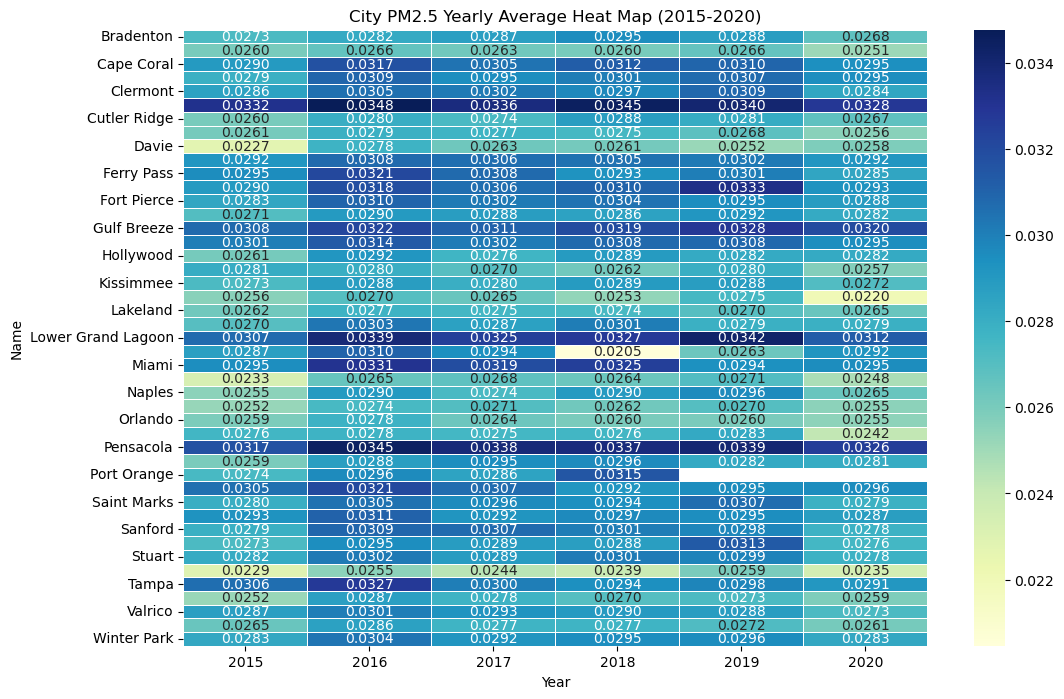

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# creat pivot table
heatmap_data = o3_city_join.pivot_table(index='Name', columns='Year', values='Ozone', aggfunc='mean')
heatmap_data.columns = heatmap_data.columns.year

# creat heat map
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".4f", linewidths=.5)
plt.title('City PM2.5 Yearly Average Heat Map (2015-2020)')
plt.show()

